In [2]:
from sklearn.model_selection import train_test_split
import json
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [18]:
def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    # open the file for reading , json is actually a dictionary
    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y

def plot_history(history, optimizer_name):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :param optimizer_name: Name of the optimizer used
    """
    fig, axs = plt.subplots(2)  # 2 figures, subplots

    # Create accuracy subplot
    axs[0].plot(history.history["acc"], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title(f"Accuracy Evaluation - {optimizer_name}")

    # Create error subplot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="validation error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title(f"Error Evaluation - {optimizer_name}")

    plt.tight_layout()
    plt.show()
    
def plot_compare_error(histories):
    """Plots error (loss) evaluation for training/validation set as a function of the epochs
    for multiple optimizer results.

    :param histories: Dictionary of optimizer_name: history pairs
    """
    fig, axs = plt.subplots(2)  # 2 figures, subplots
    for optimizer_name, history in histories.items():
        axs[0].plot(history.history["val_loss"], label=optimizer_name)
        axs[1].plot(history.history["loss"], label=optimizer_name)
    axs[0].set_ylabel("test error")
    axs[0].legend(loc="upper right")
    axs[0].set_title(f"test error")
    axs[1].set_ylabel("train error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title(f"train error")
    plt.tight_layout()
def plot_compare_acc(histories):
    """Plots error (loss) evaluation for training/validation set as a function of the epochs
    for multiple optimizer results.

    :param histories: Dictionary of optimizer_name: history pairs
    """
    fig, axs = plt.subplots(2)  # 2 figures, subplots
    for optimizer_name, history in histories.items():
        axs[0].plot(history.history["val_acc"], label=optimizer_name)
        axs[1].plot(history.history["acc"], label=optimizer_name)
    axs[0].set_ylabel("test accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title(f"test accuracy")
    axs[1].set_ylabel("train accuracy")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="lower right")
    axs[1].set_title(f"train accuracy")
    plt.tight_layout()

In this updated code, the plot_compare function now takes a histories dictionary as input, which contains the optimizer names as keys and their corresponding training histories as values. The function then plots the validation loss for each optimizer on a single plot, using a different color for each optimizer's curve. The title of the plot indicates that it's comparing optimizers.

In [27]:

if __name__ == "__main__":
    # Load data
    DATA_PATH = "data_10.json"
    X, y = load_data(DATA_PATH)  # X is input, y is target

    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Define optimizers
    optimizers = {   
        'SGD': keras.optimizers.SGD(learning_rate=0.001),
        'Momentum': keras.optimizers.SGD(learning_rate=0.001),
        'RMSprop': keras.optimizers.RMSprop(learning_rate=0.0001),
        'Adam': keras.optimizers.Adam(learning_rate=0.0001),
    }
    histories = {}
    for optimizer_name, optimizer in optimizers.items():
        # Build network topology
        model = keras.Sequential([
            # Input layer
            keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
            # 1st dense layer
            keras.layers.Dense(512, activation='relu'),
            # keras.layers.Dropout(0.3), #dropout neurons to fight overfitting, dropout probability
            # 2nd dense layer
            keras.layers.Dense(256, activation='relu'),
            # keras.layers.Dropout(0.3), #dropout neurons to fight overfitting, dropout probability
            # 3rd dense layer
            keras.layers.Dense(64, activation='relu'),
            # keras.layers.Dropout(0.3), #dropout neurons to fight overfitting, dropout probability
            # Output layer
            keras.layers.Dense(10, activation='softmax')
        ])

        # Compile model with the current optimizer
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.summary()

        # Train model
        print(f"Training model with {optimizer_name} optimizer...")
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)
        print(f"Finished training model with {optimizer_name} optimizer.\n")

        # Evaluate model
        test_loss, test_acc = model.evaluate(X_test, y_test)
        print(f"Test accuracy with {optimizer_name} optimizer: {test_acc}\n")

        # Plot training history
        # plot_history(history, optimizer_name)

        histories[optimizer_name] = history


Data succesfully loaded!
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 1690)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 512)               865792    
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_74 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_75 (Dense)             (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Training model with SGD optimizer...
Train on 6297 samples, validate on 2699 samples

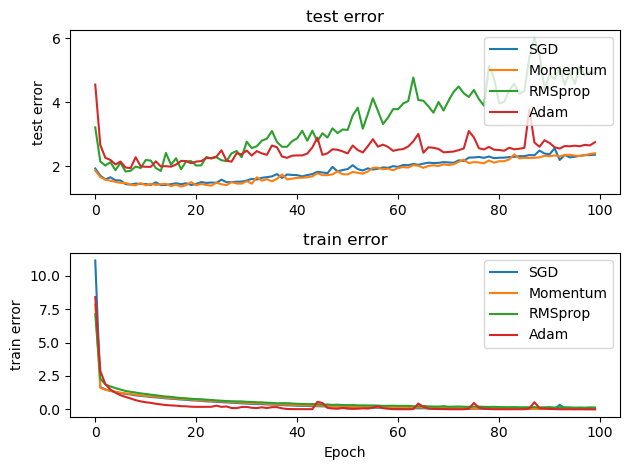

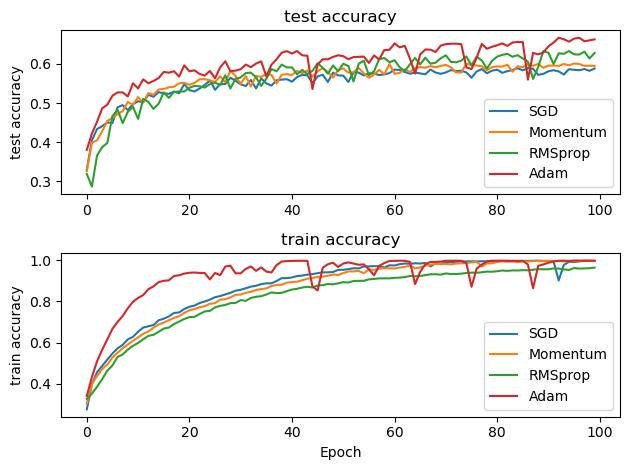

In [28]:
plot_compare_error(histories)
plot_compare_acc(histories)